# **🌟Run the new Meta-Llama_3.1 for free**

❗Colab pro version recommended. For free users i recommend to use the "Llama 3.1-8B_QuantisedxOllama" notebook. Because it will save you a lot of time. It has faster inference, smaller model size and you don't need any access to get the model

Meta Llama 3.1 is the latest open source LLM released by meta and also the most capable one right now. It supports 8 Languages `English, German, French, Italian, Portuguese, Hindi, Spanish, and Thai`. Here you can run that model for free on the free `T4 Gpu` of google colab.

The free tier only works for the [8B Model](https://huggingface.co/meta-llama/Meta-Llama-3.1-8B-Instruct), NOTE: You will need to get the access of meta Llama3.1 from huggingface

Follow the cells from top to bottom, that is from Install Packages to Run Llama3.1, I would suggest to use the gradio one for more UI based.

NOTE: You can easily run the model with the free `T4 GPU`, but it comes with some limitations you can read about on google colab, so if you have the pro subscription then `A100` is definitely recommended, else it will take you much more time on the `T4 GPU` [Just Have patience for free things🙃]

| |Google Colab|
|:--|:-:|
| ⭐ **Llama 3.1-8B_Colab** | [![Open in Colab](https://raw.githubusercontent.com/hollowstrawberry/kohya-colab/main/assets/colab-badge.svg)](https://colab.research.google.com/drive/10c_GQ8wqVXuX5JciX0gHVstO0WHaUbqD?usp=sharing )
| 🌟 **Llama 3.1-8B_QuantisedxOllama** |  [![Open in Colab](https://raw.githubusercontent.com/hollowstrawberry/kohya-colab/main/assets/colab-badge.svg)](https://colab.research.google.com/drive/1S9q6cvH8y2WMml7pczg0Bl-VS6Le-jzZ?usp=sharing)

## 🥇First Step: Get access to the model on huggingface
*Go to this [Meta-Llama-3.1-8B](https://huggingface.co/meta-llama/Meta-Llama-3.1-8B-Instruct) hugging face repositry.

*If you are signed in on hugging face then you are good to go, just fill the details like mail(Don't use tempmail) to get access.

*Wait few mins and you will get the access and message on your mail, its really a simple method just to get kinda verified that its not a bot activity.

##🥈Second Step: Add your huggingface access token in Google Colab

This is the last step before you can start running the code cells, just follow along.

*Go to [Access Token](https://huggingface.co/settings/tokens) and create your new access token with whatever name you want and the type should be `write`

*Now copy the token and paste it in your secretes  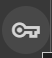  right above the file manager with `HF_TOKEN` name, something like this.

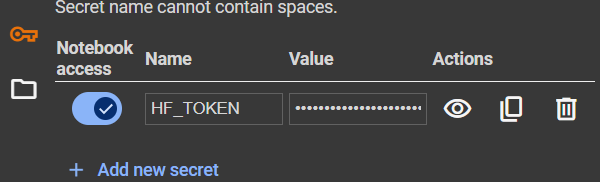

`And now you are good to go just keep scrolling down and run all the cells one by one`


In [ ]:
#@title Install Packages📦
!pip install accelerate gradio==4.36.1
!pip install --upgrade transformers
from IPython.display import clear_output
clear_output() #Clears the output

In [ ]:
#@title Download Model: Meta Llama-3.1-8B-Instruct from Huggingface✅
import transformers
import torch
from transformers import pipeline
from IPython.display import clear_output

model_id = "meta-llama/Meta-Llama-3.1-8B-Instruct"

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device_map="auto",
)

def Llama_Chat(user_msg, system_role=""):
    messages = [
        {"role": "system", "content": system_role},
        {"role": "user", "content": user_msg},
    ]
    outputs = pipeline(
        messages,
        max_new_tokens=256,
    )
    reply = outputs[0]["generated_text"][-1]["content"]
    return reply

print("Model Loaded✅")
clear_output()

In [ ]:
#@title Gradio UI(Recommended)🔗
#@markdown Run the cell, then click on the link you get after running. And you are good to go, this linked can be even shared between devices until and unless you don't switch this system off.
import time
import gradio as gr


def slow_echo(user_msg, history):
  #@markdown The system role defines/sets the behaviour of the model, for example if you want the model to behave like "Tony Stark" from the movie "Ironman" then just write it down in the system_role. Leave it empty for default model behaviour.
    system_role= ""  # @param {type: "string"}
    message=Llama_Chat(system_role,user_msg)
    for i in range(len(message)):
        time.sleep(0.05)
        yield "" + message[: i + 1]


demo = gr.ChatInterface(slow_echo)
demo.launch(share=True)